In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.convlstm.dm import ConvLSTMDataModule

dm = ConvLSTMDataModule(batch_size=5, max_len=3)

dm.setup()

In [3]:
x, y = next(iter(dm.train_dataloader()))

x.shape, y.shape

(torch.Size([5, 3, 3, 500, 500]), torch.Size([5, 1, 2000, 2000]))

In [4]:
from src.unet_lstm.model import UnetLSTMModule

model = UnetLSTMModule({
    'hidden_dim': [16, 32, 64, 128]
})

output = model(x)

output.shape

/home/juan/miniconda3/envs/ai4eo/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([5, 1, 2000, 2000])

In [27]:
dm = ConvLSTMDataModule(batch_size=5, max_len=5)
dm.setup()

x, y = next(iter(dm.train_dataloader()))

print(x.shape)

torch.Size([5, 5, 3, 500, 500])


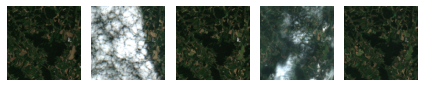

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure()
ix = 0
imgs, mask = x[ix], y[ix]
for ix, img in enumerate(imgs):
    ax = plt.subplot(2, 5, ix + 1)
    ax.imshow(img.permute(1, 2, 0))
    ax.axis('off')
plt.tight_layout()
plt.show()

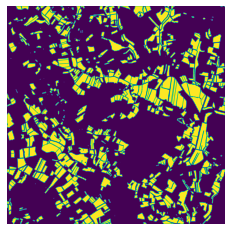

In [29]:
plt.imshow(mask[0])
plt.axis('off')
plt.show()

In [30]:
import torch 
import torch.nn.functional as F
from torchmetrics import MatthewsCorrcoef

x, y = x.cuda(), y.cuda()

model = UnetLSTMModule({
    'hidden_dim': [16, 32, 64, 128]
})
model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

metric = MatthewsCorrcoef(num_classes=2)

epochs = 200

for e in range(1, epochs + 1):
    # train
    model.train()
    y_hat = model(x)
    optimizer.zero_grad()
    loss = F.binary_cross_entropy_with_logits(y_hat, y)
    loss.backward()
    optimizer.step()
    # eval
    model.eval()
    with torch.no_grad():
        y_hat = model(x)
        val_loss = F.binary_cross_entropy_with_logits(y_hat, y)
        #_metric = metric(torch.sigmoid(y_hat), y.long())
    print(f"Epoch {e}/{epochs} loss {loss.item():.5f} val_loss {val_loss.item():.5f}")


Epoch 1/200 loss 0.68201 val_loss 0.67313
Epoch 2/200 loss 0.67775 val_loss 0.67215
Epoch 3/200 loss 0.67116 val_loss 0.67107
Epoch 4/200 loss 0.66613 val_loss 0.67002
Epoch 5/200 loss 0.66220 val_loss 0.66890
Epoch 6/200 loss 0.65836 val_loss 0.66770
Epoch 7/200 loss 0.65526 val_loss 0.66645
Epoch 8/200 loss 0.65230 val_loss 0.66516
Epoch 9/200 loss 0.64963 val_loss 0.66389
Epoch 10/200 loss 0.64720 val_loss 0.66254
Epoch 11/200 loss 0.64475 val_loss 0.66102
Epoch 12/200 loss 0.64224 val_loss 0.65919
Epoch 13/200 loss 0.63943 val_loss 0.65705
Epoch 14/200 loss 0.63637 val_loss 0.65514
Epoch 15/200 loss 0.63289 val_loss 0.65551
Epoch 16/200 loss 0.62885 val_loss 0.65832
Epoch 17/200 loss 0.62581 val_loss 0.65098
Epoch 18/200 loss 0.62353 val_loss 0.65473
Epoch 19/200 loss 0.62036 val_loss 0.65926
Epoch 20/200 loss 0.61895 val_loss 0.64650
Epoch 21/200 loss 0.61575 val_loss 0.64174
Epoch 22/200 loss 0.61358 val_loss 0.64542
Epoch 23/200 loss 0.61033 val_loss 0.65242
Epoch 24/200 loss 0.

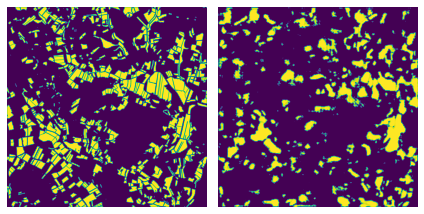

In [31]:
fig = plt.figure()
ax = plt.subplot(1, 2, 1)
ax.imshow(mask[0])
ax.axis('off')
ax = plt.subplot(1, 2, 2)
ax.imshow(torch.sigmoid(y_hat[0][0]).cpu() > 0.5)
ax.axis('off')
plt.tight_layout()
plt.show()